# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | holyhead
Processing Record 4 of Set 1 | maintirano
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | paungde
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | parauna
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | trairi
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | bangassou
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | masterton
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | leava
Processing Record 20 of Set 1 | luau
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | pangody
Processing Record 23 of Set 1 | pacasm

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,12.34,64,97,0.65,RU,1691971863
1,west island,-12.1568,96.8225,23.99,78,75,7.72,CC,1691971863
2,holyhead,53.3062,-4.6321,16.10,88,100,5.66,GB,1691971863
3,maintirano,-18.0667,44.0167,22.25,81,27,4.08,MG,1691971863
4,bethel,41.3712,-73.4140,27.17,71,0,2.06,US,1691971864


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,12.34,64,97,0.65,RU,1691971863
1,west island,-12.1568,96.8225,23.99,78,75,7.72,CC,1691971863
2,holyhead,53.3062,-4.6321,16.10,88,100,5.66,GB,1691971863
3,maintirano,-18.0667,44.0167,22.25,81,27,4.08,MG,1691971863
4,bethel,41.3712,-73.4140,27.17,71,0,2.06,US,1691971864


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

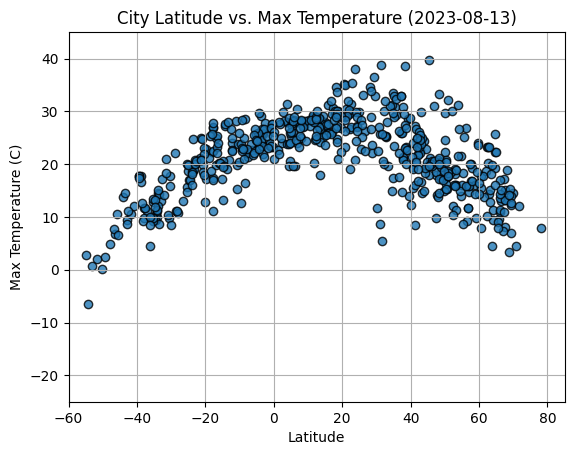

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-08-13)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-25, 45])

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

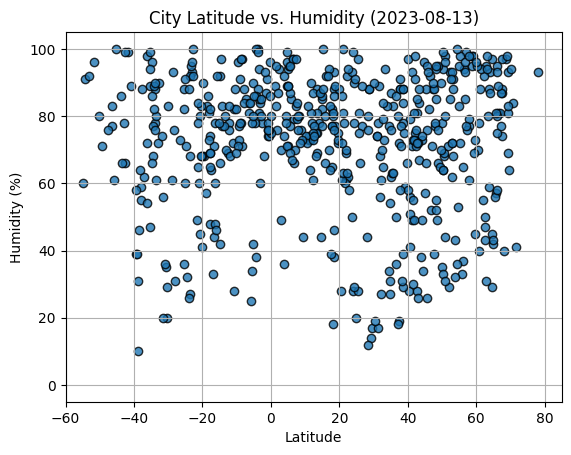

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-13)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-5, 105])

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

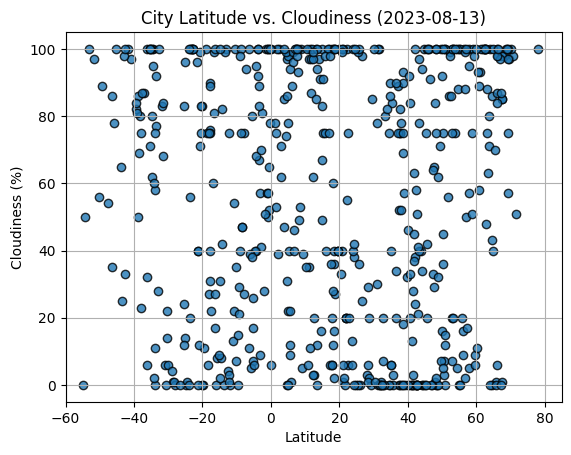

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-5, 105])

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

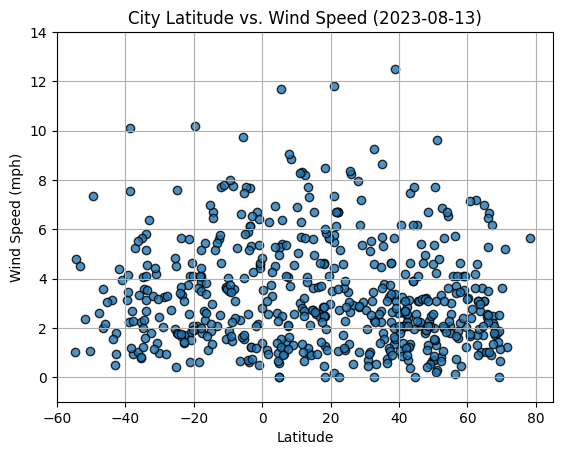

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-13)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-60, 85])
plt.ylim([-1, 14])

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation and R-squared value
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show plot
    plt.show()

In [30]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,12.34,64,97,0.65,RU,1691971863
2,holyhead,53.3062,-4.6321,16.10,88,100,5.66,GB,1691971863
4,bethel,41.3712,-73.4140,27.17,71,0,2.06,US,1691971864
5,paungde,18.4833,95.5000,24.76,93,100,2.46,MM,1691971864
6,fortuna,40.5982,-124.1573,19.43,79,20,6.17,US,1691971864


In [31]:
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,23.99,78,75,7.72,CC,1691971863
3,maintirano,-18.0667,44.0167,22.25,81,27,4.08,MG,1691971863
8,grytviken,-54.2811,-36.5092,-6.54,91,50,4.81,GS,1691971865
9,parauna,-16.9478,-50.4486,24.93,33,60,2.68,BR,1691971865
10,adamstown,-25.0660,-130.1015,18.77,60,14,4.50,PN,1691971866


###  Temperature vs. Latitude Linear Regression Plot

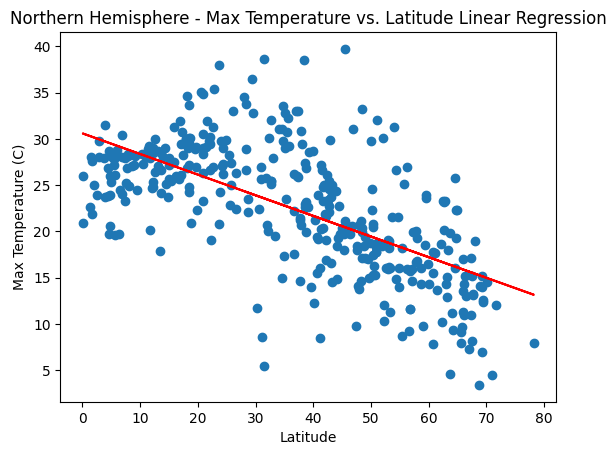

In [45]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Max Temperature vs. Latitude Linear Regression",
                       "Max Temperature (C)", (-50, 90))

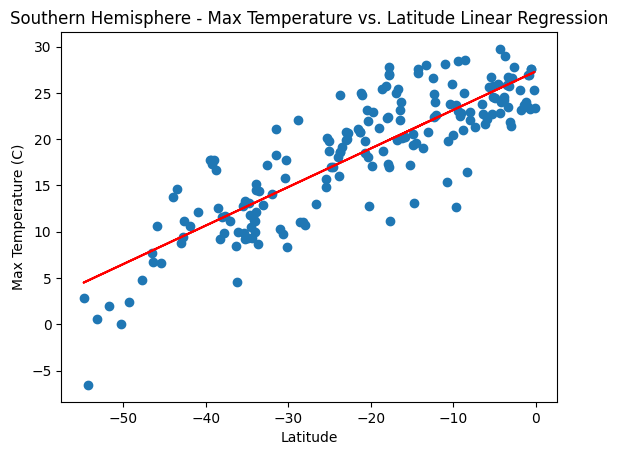

In [47]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Max Temperature vs. Latitude Linear Regression",
                       "Max Temperature (C)", (-50, 40))

**Discussion about the linear relationship:**
As i would expect, the temperature is warmest at the equater and get colder as you go further north and south. It is summer in the norther hemisphere right now which means winter in the south. The low temps there are a little colder than the low temps up here.

### Humidity vs. Latitude Linear Regression Plot

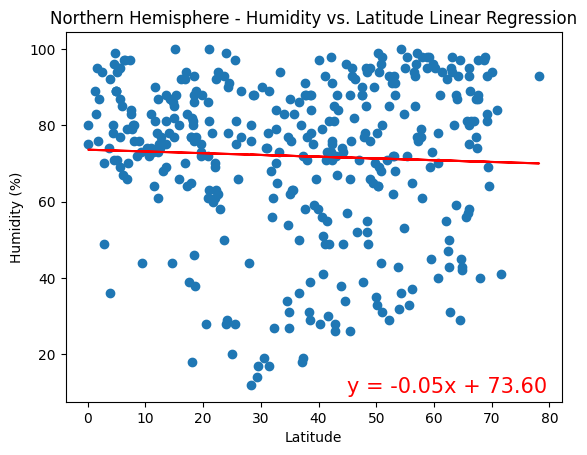

In [34]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Humidity (%)", (45, 10))


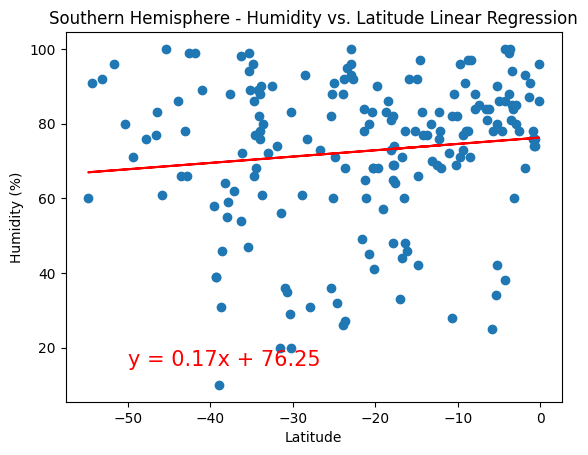

In [35]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Humidity (%)", (-50, 15))

**Discussion about the linear relationship:**
Its difficult to get any information from this. I looks like latitude doesnt affect humidity. There are clearly less cities in the south out of the random subset chosen.

### Cloudiness vs. Latitude Linear Regression Plot

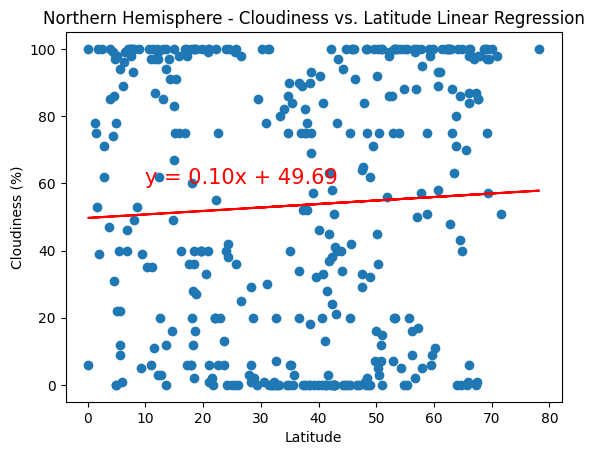

In [39]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Cloudiness (%)", (10, 60))

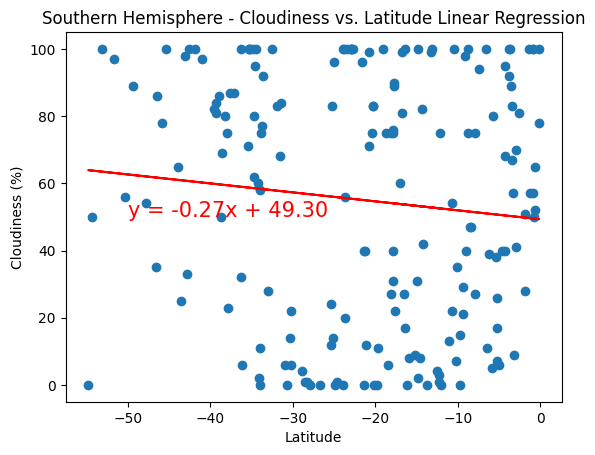

In [40]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Cloudiness (%)", (-50, 50))

**Discussion about the linear relationship:**
This is another one with little information. Latitude does not seem to affect cloudiness either. I imagine that is more a topographal relation than latitudinal. Though there is a slight decrease as you get closer to the equater.

### Wind Speed vs. Latitude Linear Regression Plot

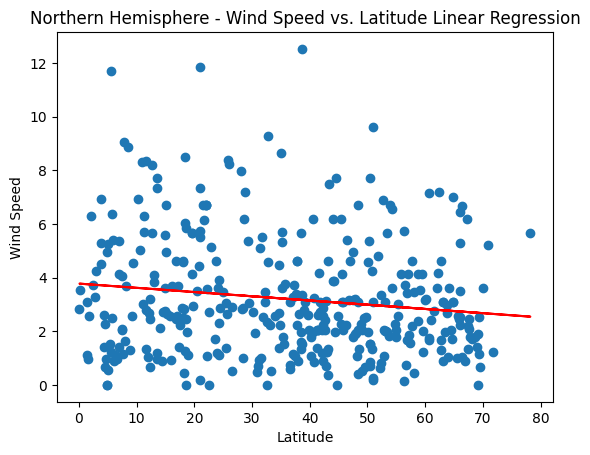

In [44]:
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Wind Speed", (40, 25))

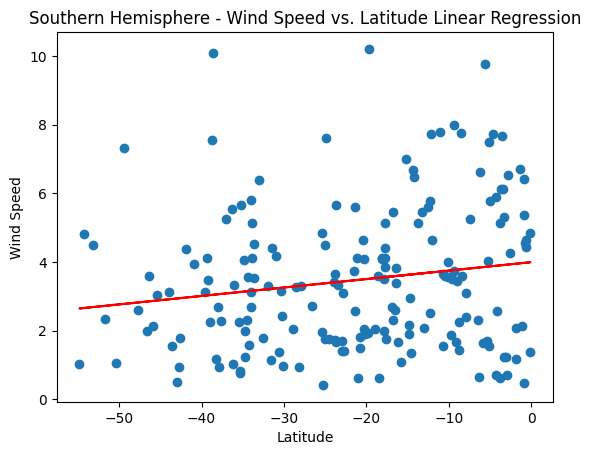

In [43]:
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Wind Speed", (-50, 20))

**Discussion about the linear relationship:**
This shows wind speed increase slightly as you get closer to the equater. Perhaps the warmer air has a tendancy to create more wind paterns. Again, i feel like this is more related to the geography of the location.